В этом ноутбуке пример с данными, которые распределены по папкам. Структура папок: https://drive.google.com/drive/folders/184Hlu4xoizPhQC3AUocvMqOhAq-AXb4O?usp=sharing

Задача свести данные в единый датафрейм и проанализировать.

Сначала импортируем нужные библиотеки и посмотрим в каком виде данные.

In [1]:
import pandas as pd
import os
import seaborn as sns

import matplotlib.pyplot as plt

In [53]:
pd.read_csv('/Users/andrejsklarov/Desktop/data/2020-12-06/Vasiliy_Fedorov/data.csv')

,Unnamed: 0,product_id,quantity
0,0,56,4
1,1,97,3
2,2,79,3
3,3,29,5


Создадим пустой датафрейм, куда будут записываться данные.

In [12]:
df = pd.DataFrame(columns = ['product_id', 'quantity', 'name', 'date'])

In [8]:
os.listdir('/Users/andrejsklarov/Desktop/Python/data/')

['lesson 5 mini project.ipynb',
 'lesson 6',
 '.DS_Store',
 '2020-12-06',
 'lesson 5 dz.ipynb',
 '2020-12-08',
 'lesson 7',
 '2020-12-09',
 '2020-12-07',
 '4_necessary_inn.txt',
 'etl - python + .ipynb',
 '2020-12-05',
 '2020-12-03',
 '2020-12-04',
 'work.ipynb',
 '.ipynb_checkpoints',
 '5_data.csv.zip',
 '4_inn.xls',
 'lesson 4 miniproject.ipynb']

In [13]:
df

,product_id,quantity,name,date


Дальше нужен скрипт, который загружает все имеющиеся данные в один датафрейм.

In [14]:
file_name = 'data.csv'
path = '/Users/andrejsklarov/Desktop/Python/data/'

for folder_date in os.listdir(path):
    if folder_date.startswith('20'):
        path_to_name = path + folder_date + '/'
        name_list = os.listdir(path_to_name)
        for name in name_list:
            path_to_file = path_to_name + name + '/' + file_name
            df_1 = pd.read_csv(path_to_file)
            df_1['name'] = name
            df_1['date'] = folder_date
            df = pd.concat([df, df_1])

In [15]:
df

,product_id,quantity,name,date,Unnamed: 0
0,56,4,Vasiliy_Fedorov,2020-12-06,0.0
1,97,3,Vasiliy_Fedorov,2020-12-06,1.0
2,79,3,Vasiliy_Fedorov,2020-12-06,2.0
3,29,5,Vasiliy_Fedorov,2020-12-06,3.0
0,73,5,Alexey_Fedorov,2020-12-08,0.0
...,...,...,...,...,...
1,3,4,Kirill_Fedorov,2020-12-04,1.0
2,89,5,Kirill_Fedorov,2020-12-04,2.0
3,75,2,Kirill_Fedorov,2020-12-04,3.0
4,41,5,Kirill_Fedorov,2020-12-04,4.0


Посмотрим, кто из клиентов купил больше всего продуктов.

In [58]:
df.groupby('name', as_index=False).agg({'quantity': 'sum'}).sort_values('quantity')

,name,quantity
20,Vasiliy_Petrov,7
2,Alexey_Petrov,7
15,Rostislav_Ivanov,9
8,Kirill_Petrov,9
12,Petr_Petrov,14
18,Vasiliy_Fedorov,15
14,Rostislav_Fedorov,16
1,Alexey_Ivanov,17
17,Rostislav_Smirnov,17
9,Kirill_Smirnov,17


Далее сгруппируем данные и посмотрим, какой продукт покупали чаще всего. Построим барплот

In [59]:
df_product = df.groupby('product_id', as_index=False).agg({'quantity': 'sum'}).sort_values('quantity')

In [60]:
df_product

,product_id,quantity
39,52,1
56,80,1
18,21,1
43,57,1
30,39,2
...,...,...
32,41,14
21,24,15
51,74,15
42,56,18


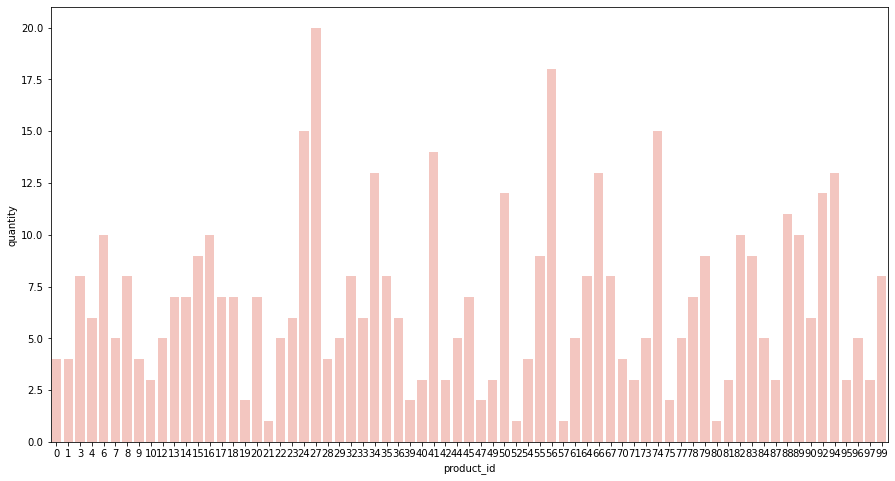

In [61]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x="product_id", y="quantity", data=df_product, color='salmon', alpha=0.5)

In [62]:
df_date = df.groupby('date', as_index=False).agg({'quantity': 'sum'}).sort_values('quantity')

In [63]:
df_date

,date,quantity
3,2020-12-06,15
0,2020-12-03,60
2,2020-12-05,61
5,2020-12-08,68
6,2020-12-09,69
4,2020-12-07,94
1,2020-12-04,113


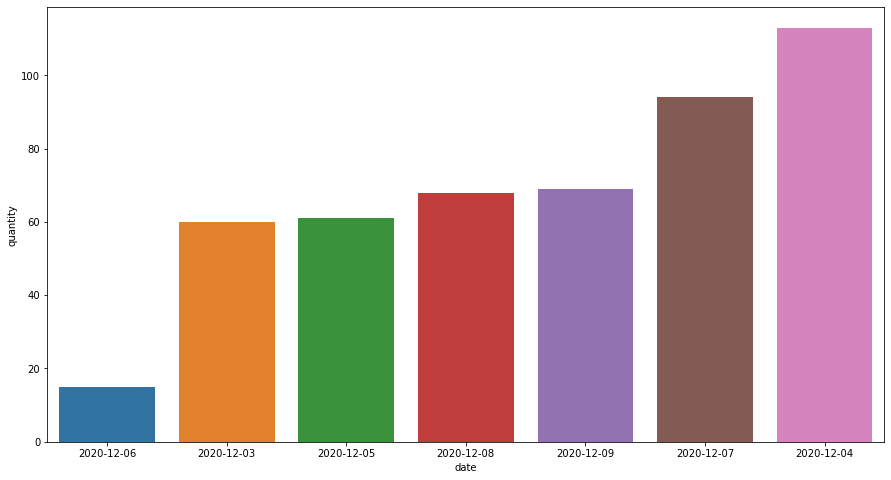

In [64]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x="date", y="quantity", data=df_date)

In [68]:
Теперь найдем, сколько пользователей и какой продукт покупали повторно. Повторная покупка - это покупка продукта с одинаковым 

,product_id,quantity,name,date,Unnamed: 0
1,34,5,Anton_Smirnov,2020-12-08,1.0
2,18,1,Anton_Smirnov,2020-12-08,2.0
1,6,1,Petr_Petrov,2020-12-08,1.0
2,24,5,Anton_Ivanov,2020-12-09,2.0
3,36,1,Anton_Ivanov,2020-12-09,3.0
...,...,...,...,...,...
1,14,5,Vasiliy_Ivanov,2020-12-04,1.0
1,3,4,Kirill_Fedorov,2020-12-04,1.0
2,89,5,Kirill_Fedorov,2020-12-04,2.0
4,41,5,Kirill_Fedorov,2020-12-04,4.0


In [74]:
df_no_duplicates = df.drop_duplicates(subset=['product_id', 'name', 'date'])

In [70]:
df

,product_id,quantity,name,date,Unnamed: 0
0,56,4,Vasiliy_Fedorov,2020-12-06,0.0
1,97,3,Vasiliy_Fedorov,2020-12-06,1.0
2,79,3,Vasiliy_Fedorov,2020-12-06,2.0
3,29,5,Vasiliy_Fedorov,2020-12-06,3.0
0,73,5,Alexey_Fedorov,2020-12-08,0.0
...,...,...,...,...,...
1,3,4,Kirill_Fedorov,2020-12-04,1.0
2,89,5,Kirill_Fedorov,2020-12-04,2.0
3,75,2,Kirill_Fedorov,2020-12-04,3.0
4,41,5,Kirill_Fedorov,2020-12-04,4.0


In [75]:
df_no_duplicates.groupby(['name', 'product_id'], as_index=False).agg({'date': 'count'}).query('date > 1')

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2


In [92]:
inn_list = open('4_necessary_inn.txt').readlines()

In [100]:

inn_clear = []
for i in inn_list:
    i = i.replace('\n','')
    inn_clear.append(i)


In [101]:
inn_clear

['394609645484',
 '281578625230',
 '923769811917',
 '998694734508',
 '271011690615',
 '924952812367',
 '646685244561',
 '581531230312',
 '841967395801',
 '962179889311',
 '873191383820',
 '590538076039',
 '194319975048',
 '614658394086',
 '571270160555',
 '609400911893',
 '595260069852',
 '706966142477',
 '173050718969',
 '968048428696',
 '806967744814',
 '575198252501',
 '283081417246',
 '663119569897',
 '600958529354',
 '280452832937',
 '415557497037',
 '195142638722',
 '472181033836',
 '722903871682',
 '442387408954',
 '196518820495',
 '653798670054',
 '126259856639',
 '175482780898',
 '192518356612',
 '817648134701',
 '321724220657',
 '864970037680',
 '822991191528',
 '205472219644',
 '532801459453',
 '657038381012',
 '197916669463',
 '849814898285',
 '617082656257',
 '500480544925',
 '765833725639',
 '263518962896',
 '415856290529',
 '812729265571',
 '688172366656',
 '837771137752',
 '456294893364',
 '668157292633',
 '491435460276',
 '323896131459',
 '664667769879',
 '293128896936

In [77]:
df_inn_xls = pd.read_excel('4_inn.xls')

In [83]:
search_list = ['394609645484', '281578625230']

In [88]:
df_inn_xls['head_inn'] = df_inn_xls.head_inn.astype('str')

In [118]:
df_inn_xls_filtr = df_inn_xls.query('head_inn in @inn_clear')

In [116]:
df_inn_xls.columns = df_inn_xls.columns.str.replace(",", "_")

In [120]:
df_inn_xls_filtr.income_RUB.sum()

6104522627393